# Fundamentos de Ciencias de Datos
# Trabajo Práctico 1
## Integrantes:
- Florencia Fernández
- Leandro Salvañá

# Ejercicio 2
El presente informe tiene como objetivo llevar a cabo un análisis descriptivo y exploratorio de dos conjuntos de datos: el tipo de cambio oficial y paralelo en Argentina en el período del 1 de Junio de 2017 al 22 de Febrero del 2020, junto con el flujo de turistas provenientes de países limítrofes en el período de Enero del 2013 a marzo del 2021. Este análisis pretende arrojar luz sobre la distribución de las variables, describir los fenómenos que puedan observarse en esta exploración y, en particular, identificar posibles relaciones existentes entre dichas variables.

Los números de las secciones no se corresponden con las consignas del trabajo práctio, más bien siguen una lógica interna del planteamiento del análisis, pero todos los apartados se encuentran resueltos.

---
##1 - Importar los datasets
Primero se importan los datasets de los tipos de cambio y de las llegadas de turistas a dataframes de Pandas. Los dataframes se encuentran en el mismo archivo excel, llamado "tc_turistas.xlsx", en dos hojas diferentes: "tipos de cambio" y "llegadas de turistas" respectivamente. 

In [1]:
import pandas as pd

# Ruta del archivo Excel
archivo_excel = "tc_turistas.xlsx"

# Nombre de las hojas de Excel
hoja_tipos_cambio = "tipos de cambio"
hoja_llegadas_turistas = "llegadas de turistas"

# Importar los tipos de cambio a un DataFrame
df_tipos_cambio = pd.read_excel(archivo_excel, sheet_name=hoja_tipos_cambio)

# Importar las llegadas de turistas a un DataFrame
df_llegadas_turistas = pd.read_excel(archivo_excel, sheet_name=hoja_llegadas_turistas)

# Verificar la importación de los datos
print("DataFrame de tipos de cambio:")
print(df_tipos_cambio)

print("\nDataFrame de llegadas de turistas:")
print(df_llegadas_turistas)



DataFrame de tipos de cambio:
          FECHA  DOLAR Oficial  DOLAR Blue
0    2017-06-01          16.25       16.30
1    2017-06-02          16.20       16.32
2    2017-06-03            NaN         NaN
3    2017-06-04            NaN         NaN
4    2017-06-05          16.20       16.34
...         ...            ...         ...
999  2020-02-25            NaN         NaN
1000 2020-02-26          63.75       78.70
1001 2020-02-27          63.75       78.50
1002 2020-02-28          64.00       78.50
1003 2020-02-29            NaN         NaN

[1004 rows x 3 columns]

DataFrame de llegadas de turistas:
    anio  mes   date        Bolivia         Brasil         Chile  \
0   2013  ene  41275  141417.459190  112996.623524  66007.699999   
1   2013  feb  41306   95204.256341  161366.098439  62013.313451   
2   2013  mar  41334   82862.061107   96727.365114  81096.057038   
3   2013  abr  41365   72009.462620   66978.888460  55096.585327   
4   2013  may  41395   79131.435938   63886.966089  6

---
##2 - Limpiar y normalizar los dataframes
Los datasets crudos suelen contener valores faltantes o erróneos, además de nombres de columnas inconsistentes o poco descriptivos. El objetivo de esta parte es corregir esto. 

---
### 2.1 - Nombres de columnas y tipos de dato
Se analizan los nombres y tipos de dato de las columnas de los dataframes.

In [2]:
# Obtener los nombres de las columnas de df_tipos_cambio
columnas_tipos_cambio = list(df_tipos_cambio.columns)

# Imprimir los nombres de las columnas de df_tipos_cambio
print('________________________________________________')
print("Nombres de las columnas de df_tipos_cambio:")
print(columnas_tipos_cambio)

# Obtener los tipos de cada columna en df_tipos_cambio
tipos_tipos_cambio = df_tipos_cambio.dtypes

# Imprimir los tipos de cada columna en df_tipos_cambio
print("\nTipos de cada columna en df_tipos_cambio:")
print(tipos_tipos_cambio)


# Obtener los nombres de las columnas de df_llegadas_turistas
columnas_llegadas_turistas = list(df_llegadas_turistas.columns)

# Imprimir los nombres de las columnas de df_llegadas_turistas
print('________________________________________________')
print("\nNombres de las columnas de df_llegadas_turistas:")
print(columnas_llegadas_turistas)

# Obtener los tipos de cada columna en df_llegadas_turistas
tipos_llegadas_turistas = df_llegadas_turistas.dtypes

# Imprimir los tipos de cada columna en df_llegadas_turistas
print("\nTipos de cada columna en df_llegadas_turistas:")
print(tipos_llegadas_turistas)


________________________________________________
Nombres de las columnas de df_tipos_cambio:
['FECHA', 'DOLAR Oficial', 'DOLAR Blue']

Tipos de cada columna en df_tipos_cambio:
FECHA            datetime64[ns]
DOLAR Oficial           float64
DOLAR Blue              float64
dtype: object
________________________________________________

Nombres de las columnas de df_llegadas_turistas:
['anio', 'mes', 'date', 'Bolivia', 'Brasil', 'Chile', 'Paraguay', 'Uruguay']

Tipos de cada columna en df_llegadas_turistas:
anio          int64
mes          object
date          int64
Bolivia     float64
Brasil      float64
Chile       float64
Paraguay    float64
Uruguay     float64
dtype: object


---
### 2.2 - Normalización de nombres de columnas
Al ver en el apartado anterior que los nombres de las columnas no presentaban un formato homogéneo se procede a normalizarlos. Los criterios utilizados fueron los siguientes:
1.   Todas las letras deben estar en minúscula
2.   Los nombres no debe contener caracteres específicos del idioma como *ñ* o tildes.
3.   Los espacios se reemplazan por guiones bajo: "_".

Con esto se busca evitar errores al exportar e importar los dataframes ya curados

Además se homogeneizó el idioma de las columnas al español que fue el idioma preferido para este análisis dadas sus condiciones particulares.

In [3]:
# DataFrame df_tipos_cambio
nombres_columnas_tipos_cambio = ['fecha', 'dolar_oficial', 'dolar_blue']
df_tipos_cambio.columns = nombres_columnas_tipos_cambio

# DataFrame df_llegadas_turistas
nombres_columnas_llegadas_turistas = ['anio', 'mes', 'fecha', 'bolivia', 'brasil', 'chile', 'paraguay', 'uruguay']
df_llegadas_turistas.columns = nombres_columnas_llegadas_turistas

# Imprimir los dataframes con los nuevos nombres de columnas
print('________________________________________________')
print("DataFrame df_tipos_cambio con nuevos nombres de columnas:")
print(df_tipos_cambio.head())
print('________________________________________________')
print("\nDataFrame df_llegadas_turistas con nuevos nombres de columnas:")
print(df_llegadas_turistas.head())


________________________________________________
DataFrame df_tipos_cambio con nuevos nombres de columnas:
       fecha  dolar_oficial  dolar_blue
0 2017-06-01          16.25       16.30
1 2017-06-02          16.20       16.32
2 2017-06-03            NaN         NaN
3 2017-06-04            NaN         NaN
4 2017-06-05          16.20       16.34
________________________________________________

DataFrame df_llegadas_turistas con nuevos nombres de columnas:
   anio  mes  fecha        bolivia         brasil         chile      paraguay  \
0  2013  ene  41275  141417.459190  112996.623524  66007.699999  50277.720853   
1  2013  feb  41306   95204.256341  161366.098439  62013.313451  52666.951095   
2  2013  mar  41334   82862.061107   96727.365114  81096.057038  92714.958474   
3  2013  abr  41365   72009.462620   66978.888460  55096.585327  67716.242304   
4  2013  may  41395   79131.435938   63886.966089  61641.446807  70544.694702   

        uruguay  
0  52456.413939  
1  41377.875955  

---
###2.3 - Cambio de formato de fecha

La columna "fecha" (anteriormente "date") contenía un número entero que corresponden a la cantidad de días transcurridos desde 30/12/1899, por esto se procedió a cambiarlo al formato y tipo correctos para una fecha. 

In [4]:
from datetime import datetime, timedelta

# Números de la columna "fecha" en df_llegadas_turistas
numeros_fecha = df_llegadas_turistas['fecha']

# Fecha de referencia (12 de diciembre de 1899 en este caso)
fecha_referencia = datetime(1899, 12, 30)

# Lista para almacenar las fechas convertidas
fechas_convertidas = []

# Convertir los números a fechas
for numero in numeros_fecha:
    fecha_convertida = fecha_referencia + timedelta(days=numero)
    fechas_convertidas.append(fecha_convertida)

# Crear una nueva columna "fecha" en el dataframe df_llegadas_turistas
df_llegadas_turistas['fecha'] = fechas_convertidas

# Imprimir el dataframe con la columna de fechas convertidas
print('________________________________________________')
print('Dataframe con la columna "fecha" convertida:')
print(df_llegadas_turistas.head())

# Imprimir los nuevos tipos de la columnas para verificar que "fecha" tengo el formato correcto
print('________________________________________________')
print('Tipos columnas:')
print(df_llegadas_turistas.dtypes)




________________________________________________
Dataframe con la columna "fecha" convertida:
   anio  mes      fecha        bolivia         brasil         chile  \
0  2013  ene 2013-01-01  141417.459190  112996.623524  66007.699999   
1  2013  feb 2013-02-01   95204.256341  161366.098439  62013.313451   
2  2013  mar 2013-03-01   82862.061107   96727.365114  81096.057038   
3  2013  abr 2013-04-01   72009.462620   66978.888460  55096.585327   
4  2013  may 2013-05-01   79131.435938   63886.966089  61641.446807   

       paraguay       uruguay  
0  50277.720853  52456.413939  
1  52666.951095  41377.875955  
2  92714.958474  43728.713276  
3  67716.242304  27458.646062  
4  70544.694702  23592.398421  
________________________________________________
Tipos columnas:
anio                 int64
mes                 object
fecha       datetime64[ns]
bolivia            float64
brasil             float64
chile              float64
paraguay           float64
uruguay            float64
dtype:

---
### 2.4 - Convertir las llegadas de turistas a números enteros
Las llegadas de turistas poseen cifras decimales que, como dice la hoja "metadatos 2", deben ser eliminadas. 

In [5]:
# Lista de las columnas a convertir
columnas_float = ['bolivia', 'brasil', 'chile', 'paraguay', 'uruguay']

# Convertir las columnas a tipo entero
df_llegadas_turistas[columnas_float] = df_llegadas_turistas[columnas_float].astype(int)

# Imprimir el dataframe con las columnas convertidas
print('________________________________________________')
print('Dataframe Resultante:')
print(df_llegadas_turistas)

# Imprimir los nuevos tipos de la columnas para verificar que "fecha" tengo el formato correcto
print('________________________________________________')
print('Tipos columnas:')
print(df_llegadas_turistas.dtypes)

________________________________________________
Dataframe Resultante:
    anio  mes      fecha  bolivia  brasil  chile  paraguay  uruguay
0   2013  ene 2013-01-01   141417  112996  66007     50277    52456
1   2013  feb 2013-02-01    95204  161366  62013     52666    41377
2   2013  mar 2013-03-01    82862   96727  81096     92714    43728
3   2013  abr 2013-04-01    72009   66978  55096     67716    27458
4   2013  may 2013-05-01    79131   63886  61641     70544    23592
..   ...  ...        ...      ...     ...    ...       ...      ...
94  2020  nov 2020-11-01     1868    1148   1428       704      594
95  2020  dic 2020-12-01     3475    2825   2039      1181     1262
96  2021  ene 2021-01-01     2103    2280    936       420     3618
97  2021  feb 2021-02-01      874    1419    476       879     1713
98  2021  mar 2021-03-01     1117    1374    517       654     2223

[99 rows x 8 columns]
________________________________________________
Tipos columnas:
anio                 int6

---
### 2.5 - Corroborar datos faltantes
Se investigó si en los dataframes había datos faltantes.

In [6]:
# Obtener los datos faltantes del dataframe df_llegadas_turistas
datos_faltantes_por_col = df_llegadas_turistas.isnull().sum()

#Imprimir el resultado
print('________________________________________________')
print('Datos faltantes por columna de Llegadas Turistas:')
print(datos_faltantes_por_col)

# Obtener los datos faltantes del dataframe df_tipos_cambio
datos_faltantes_por_col = df_tipos_cambio.isnull().sum()

#Imprimir el resultado
print('________________________________________________')
print('Datos faltantes por columna de Tipos de Cambio:')
print(datos_faltantes_por_col)

________________________________________________
Datos faltantes por columna de Llegadas Turistas:
anio        0
mes         0
fecha       0
bolivia     0
brasil      0
chile       0
paraguay    0
uruguay     0
dtype: int64
________________________________________________
Datos faltantes por columna de Tipos de Cambio:
fecha              0
dolar_oficial    336
dolar_blue       333
dtype: int64


---
###2.6 - Imputar datos faltantes
En el dataframe de los tipos de datos faltan aproximadamente un tercio de los valores de dólar oficial y paralelo con respecto al total de registros. Muchos de estos corresponden a fines de semana y días dónde el mercado no tiene actividad, por lo tanto, en esos días el valor del dólar no se modificó. Por lo tanto, se decidió imputar los valores con el anterior no faltante.

In [7]:
import numpy as np

#Imprimir el Dataframe antes de modificarlo 
print('________________________________________________')
print('Dataframe antes de la imputación:')
print(df_tipos_cambio.head())

# Imputar los valores faltantes utilizando el valor inmediato con menor índice no faltante
df_tipos_cambio['dolar_oficial'] = df_tipos_cambio['dolar_oficial'].fillna(method='ffill')
df_tipos_cambio['dolar_blue'] = df_tipos_cambio['dolar_blue'].fillna(method='ffill')

# Obtener los datos faltantes del dataframe df_tipos_cambio
datos_faltantes_por_col = df_tipos_cambio.isnull().sum()

#Imprimir el resultado
print('________________________________________________')
print('Datos faltantes por columna de Tipos de Cambio:')
print(datos_faltantes_por_col)
print('________________________________________________')
print('Dataframe resultante:')
print(df_tipos_cambio.head())


________________________________________________
Dataframe antes de la imputación:
       fecha  dolar_oficial  dolar_blue
0 2017-06-01          16.25       16.30
1 2017-06-02          16.20       16.32
2 2017-06-03            NaN         NaN
3 2017-06-04            NaN         NaN
4 2017-06-05          16.20       16.34
________________________________________________
Datos faltantes por columna de Tipos de Cambio:
fecha            0
dolar_oficial    0
dolar_blue       0
dtype: int64
________________________________________________
Dataframe resultante:
       fecha  dolar_oficial  dolar_blue
0 2017-06-01          16.25       16.30
1 2017-06-02          16.20       16.32
2 2017-06-03          16.20       16.32
3 2017-06-04          16.20       16.32
4 2017-06-05          16.20       16.34


---
##3 - Exploración de los dataframes
En esta sección el objetivo es realizar un análisis exploratorio y descriptivo: conocer algunas medidas de resumen, verificar la distribución de las variables, la presencia de valores atípicos y las correlaciones entre las variables.

---
###3.1 - Medidas de resumen
Para ambos dataframes se obtienen:
1. La cantidad de registros
2. La media
3. La desviación estándar
4. El mínimo
5. El primer cuartil
6. La mediana
7. El tercer cuartil
8. El máximo

In [8]:
#Se hace una copia de df_llegadas_turistas para eliminar 
#la columna "anio" de la cual no interesan sus medidas de resumen
columnas_describir_turistas = df_llegadas_turistas.drop("anio", axis=1)

#Imprimir información de los dataframe
print('___________________________________________________')
print('Medidas de resumen del dataframe Tipos de Cambio:')
print(df_tipos_cambio.describe().round(2))

print('___________________________________________________')
print('Medidas de resumen del dataframe Llegadas Turistas:')
print(columnas_describir_turistas.describe().astype(int))

___________________________________________________
Medidas de resumen del dataframe Tipos de Cambio:
       dolar_oficial  dolar_blue
count        1004.00     1004.00
mean           35.98       37.69
std            16.06       18.77
min            16.05       16.30
25%            19.90       20.03
50%            37.80       37.80
75%            45.60       45.60
max            65.00       80.00
___________________________________________________
Medidas de resumen del dataframe Llegadas Turistas:
       bolivia  brasil            chile  paraguay  uruguay
count       99      99               99        99       99
mean     92308   84345    5776149582975     60989    32598
std      41284   48905   57471962054243     29121    19648
min          0       0                0         0        0
25%      83523   60852            55932     50328    22726
50%      96403   82062            65602     65150    26551
75%     113500  103991            78329     75239    44137
max     187955  242582  5

De este análisis se descubre principalmente que en la columna correspondiente a Chile claramente hay uno o más valores atípicos erróneos puesto que el máximo y el promedio dan un número que excede la población total del país. 
También se desprenden otras conclusiones de las cuales se hablarán más adelante después de graficar los datos.

---
####3.1.1 - Corrección de valores erróneos en la columna "chile"
En esta subsección se propone encontrar el o los valores erróneos y tratar de corregirlos.

---
##### 3.1.1.1 - Graficar los valores de la columna "chile"
Se realiza un Raincloud plot de los valores de la columna "chile" para conocer la distribución de valores.

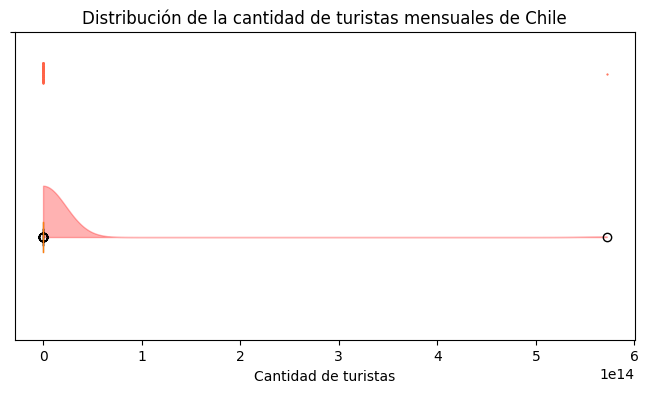

In [9]:
import matplotlib.pyplot as plt

# Función para generar datos con ruido
def generate_data(values, probabilities, size=500):
    data = np.random.choice(values, p=probabilities, size=size)
    noise = np.random.uniform(low=-1, high=1, size=len(data))
    return data.astype(float) + noise

# Obtener los datos de la serie df_llegadas_turistas['chile']
data_chile = df_llegadas_turistas['chile'].values

# Preparar el gráfico
fig, ax = plt.subplots(figsize=(8, 4))

# Colores personalizados para boxplots, violin plots y scatter plots
boxplot_color = 'lightyellow'
violin_color = 'red'
scatter_color = 'tomato'

# Dibujar boxplot
bp = ax.boxplot(data_chile, patch_artist=True, vert=False)
bp['boxes'][0].set_facecolor(boxplot_color)
bp['boxes'][0].set_alpha(0.4)

# Dibujar violin plot
vp = ax.violinplot(data_chile, points=500, showmeans=False, showextrema=False, showmedians=False, vert=False)
vp['bodies'][0].get_paths()[0].vertices[:, 1] = np.clip(vp['bodies'][0].get_paths()[0].vertices[:, 1], 1, 2)
vp['bodies'][0].set_color(violin_color)

# Dibujar scatter plot
y = np.full(len(data_chile), 1.8) + np.random.uniform(low=-.05, high=.05, size=len(data_chile))
plt.scatter(data_chile, y, s=.3, c=scatter_color)

# Configurar las etiquetas y el título del gráfico
plt.yticks([2], [''])
plt.xlabel('Cantidad de turistas')
plt.title("Distribución de la cantidad de turistas mensuales de Chile")

# Mostrar el gráfico
plt.show()


En el Raincloud plot realizado puede verse claramente que hay un valor exageradamente alto.

---
#####3.1.1.2 - Eliminar el valor erróneo
Se elimina el valor máximo de la columna "chile" y se recupera el índice.

In [10]:
# Obtener el índice del valor máximo(erróneo) en la columna "chile"
err_index = df_llegadas_turistas['chile'].idxmax()

# Obtener el valor erróneo
val_err = df_llegadas_turistas.loc[err_index, 'chile']

# Obtener el mes del valor erróneo
mes_err = df_llegadas_turistas.loc[err_index, 'mes']

# Obtener el año del valor erróneo
anio_err = df_llegadas_turistas.loc[err_index, 'anio']

#imprimir el valor máximo y el índice correspondiente a modo de control
print(f'Valor erróneo: {val_err}')
print(f'Mes dónde se da el valor erróneo: {mes_err}')
print(f'Año dónde se da el valor erróneo: {anio_err}')
print(f'Índice del valor erróneo: {err_index}')

# Reemplazar el valor máximo por np.nan
df_llegadas_turistas.loc[err_index, 'chile'] = np.nan


Valor erróneo: 571838802363218
Mes dónde se da el valor erróneo: abr
Año dónde se da el valor erróneo: 2018
Índice del valor erróneo: 63


---
#####3.1.1.3 - Conocer el contexto para imputar el dato eliminado
Para poder imputar el dato eliminado se desea conocer el comportamiento promedio de los demás meses en cada año del país de Chile. Se desea conocer específicamente el de Chile porque aunque revisar otros países sin ese dato faltante podría aportar información, también hay factores internos del país que pueden influir en si un Chileno elige a Argentina como destino turístico, que pueden ser distintos los de Bolivia por ejemplo. 

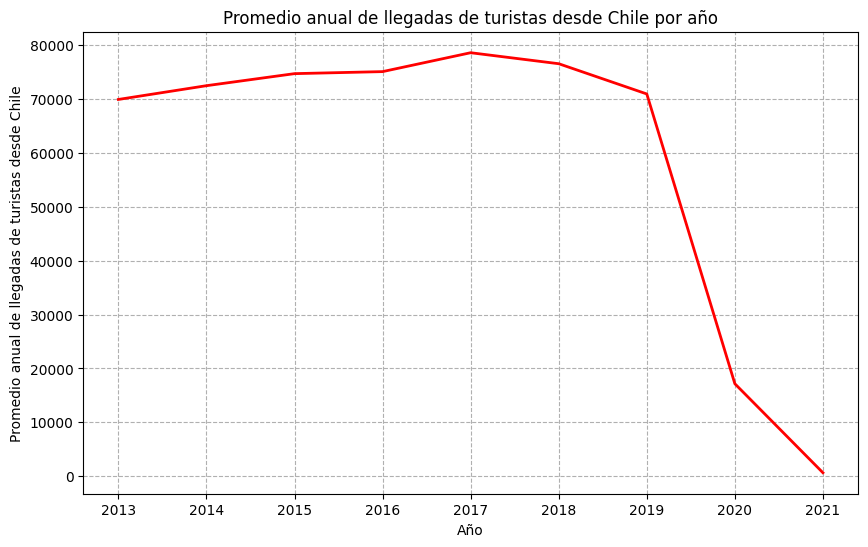

In [11]:
# Seleccionar las columnas deseadas
df_chile = df_llegadas_turistas[['anio', 'chile']]

# Agrupar por año y calcular el promedio
df_agrupado = df_chile.groupby('anio').mean()

# Crear el gráfico de líneas
fig, ax = plt.subplots(figsize=(10, 6))

# Configurar el estilo y los colores del gráfico
ax.plot(df_agrupado.index, df_agrupado['chile'], linestyle='-', linewidth=2, color='red')

# Configurar los ejes y el título del gráfico
ax.set_xlabel('Año')
ax.set_ylabel('Promedio anual de llegadas de turistas desde Chile')
ax.set_title('Promedio anual de llegadas de turistas desde Chile por año')

# Personalizar los ticks del eje x (años)
ax.set_xticks(df_agrupado.index)
ax.set_xticklabels(df_agrupado.index)

# Añadir una rejilla al gráfico
ax.grid(True, linestyle='--')

# Mostrar el gráfico
plt.show()




Al graficar el promedio anual de turistas llegados desde chile puede verse que para el período de interés (2017 a 2019) el comportamiento es muy similar al lineal. Por lo tanto, tomar el promedio de los turistas arribados en abril del 2017 y los de abril del 2019 parece ser una opción viable que no se desviaría mucho de la realidad.

---
#####3.1.1.4 - Imputar el valor faltante
Se obtienen los valores de la columna 'chile' en el dataframe 'df_llegadas_turistas' correspondientes al mes de abril para los años 2017 y 2019, se realiza el promedio y luego se imputa dicho valor para los turistas llegados de chile en el mes de abril de 2018.




In [12]:
# Obtener los valores para realizar el promedio
chile_abr_2017 = df_llegadas_turistas.loc[(df_llegadas_turistas['anio'] == 2017) & (df_llegadas_turistas['mes'] == 'abr'), 'chile'].values[0]
chile_abr_2019 = df_llegadas_turistas.loc[(df_llegadas_turistas['anio'] == 2019) & (df_llegadas_turistas['mes'] == 'abr'), 'chile'].values[0]

# Calcular el promedio
promedio = int((chile_abr_2017 + chile_abr_2019)/2)

# Imputar el valor promedio en el registro de índice 63 (el calculado previamente)
df_llegadas_turistas.loc[63, 'chile'] = promedio
df_llegadas_turistas['chile'] = df_llegadas_turistas['chile'].astype(int)



---
#####3.1.1.5 - Observar el resultado de la corrección
Finalmente para concluir la corrección se realiza un plot de Raincloud para observar el resultado de lo realizado.

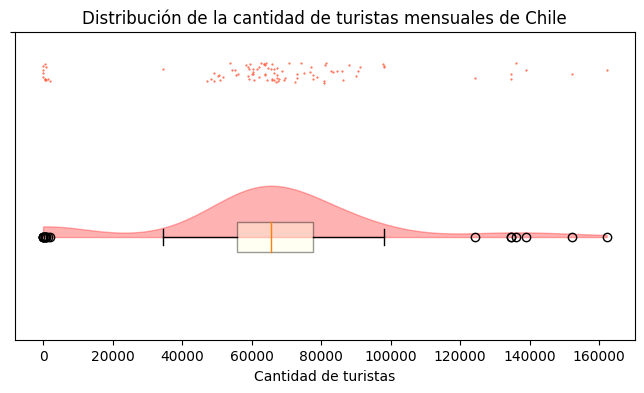

In [13]:
# Función para generar datos con ruido
def generate_data(values, probabilities, size=500):
    data = np.random.choice(values, p=probabilities, size=size)
    noise = np.random.uniform(low=-1, high=1, size=len(data))
    return data.astype(float) + noise

# Obtener los datos de la serie df_llegadas_turistas['chile']
data_chile = df_llegadas_turistas['chile'].values

# Preparar el gráfico
fig, ax = plt.subplots(figsize=(8, 4))

# Colores personalizados para boxplots, violin plots y scatter plots
boxplot_color = 'lightyellow'
violin_color = 'red'
scatter_color = 'tomato'

# Dibujar boxplot
bp = ax.boxplot(data_chile, patch_artist=True, vert=False)
bp['boxes'][0].set_facecolor(boxplot_color)
bp['boxes'][0].set_alpha(0.4)

# Dibujar violin plot
vp = ax.violinplot(data_chile, points=500, showmeans=False, showextrema=False, showmedians=False, vert=False)
vp['bodies'][0].get_paths()[0].vertices[:, 1] = np.clip(vp['bodies'][0].get_paths()[0].vertices[:, 1], 1, 2)
vp['bodies'][0].set_color(violin_color)

# Dibujar scatter plot
y = np.full(len(data_chile), 1.8) + np.random.uniform(low=-.05, high=.05, size=len(data_chile))
plt.scatter(data_chile, y, s=.3, c=scatter_color)

# Configurar las etiquetas y el título del gráfico
plt.yticks([2], [''])
plt.xlabel('Cantidad de turistas')
plt.title("Distribución de la cantidad de turistas mensuales de Chile")

# Mostrar el gráfico
plt.show()


---
#### 3.1.2 - Medidas de resumen luego de corregir los valores erróneos



In [14]:
#Se hace una copia de df_llegadas_turistas para eliminar 
#la columna "anio" de la cual no interesan sus medidas de resumen
columnas_describir_turistas = df_llegadas_turistas.drop("anio", axis=1)

#Imprimir información de los dataframe
print('___________________________________________________')
print('Medidas de resumen del dataframe Tipos de Cambio:')
print(df_tipos_cambio.describe().round(2))

print('___________________________________________________')
print('Medidas de resumen del dataframe Llegadas Turistas:')
print(columnas_describir_turistas.describe().astype(int))

___________________________________________________
Medidas de resumen del dataframe Tipos de Cambio:
       dolar_oficial  dolar_blue
count        1004.00     1004.00
mean           35.98       37.69
std            16.06       18.77
min            16.05       16.30
25%            19.90       20.03
50%            37.80       37.80
75%            45.60       45.60
max            65.00       80.00
___________________________________________________
Medidas de resumen del dataframe Llegadas Turistas:
       bolivia  brasil   chile  paraguay  uruguay
count       99      99      99        99       99
mean     92308   84345   64825     60989    32598
std      41284   48905   32616     29121    19648
min          0       0       0         0        0
25%      83523   60852   55932     50328    22726
50%      96403   82062   65602     65150    26551
75%     113500  103991   77669     75239    44137
max     187955  242582  162180    138972    86374


---
####3.1.3 - Análisis de las medidas de resumen
A partir del cálculo de las medidas de resumen, se puede deducir que el precio del dólar entre junio de 2017 y febrero de 2020 mostró variaciones significativas. En primer lugar, se observó un valor mínimo de \$16,05 para la cotización oficial y de \$16,30 para la cotización paralela, generando una diferencia de \$0,24 entre ambas. Por otro lado, se registró un valor máximo durante el mismo período, alcanzando los \$65 para la cotización oficial y los $80 para la cotización paralela, lo que representó una brecha de \$15.

Asimismo, se destaca que durante la mitad del tiempo analizado, tanto la cotización oficial como la paralela se mantuvieron por debajo de los \$37,8. La otra mitad del período, en cambio, superó dicho valor, con un promedio de \$35,98 para el dólar oficial y de \$37,69 para el blue. Es interesante destacar que la desviación promedio con respecto a la media fue de \$16,06 para el dólar oficial (igual al valor mínimo registrado) y de \$18,77 para el blue (superior a su valor mínimo). En resumen, en un lapso de dos años y dos meses, el valor del dólar experimentó un incremento de aproximadamente un 450% en promedio (considerando tanto la cotización oficial como la paralela). Además, la diferencia promedio respecto a su valor medio superó el 100% del valor inicial, y la brecha osciló entre un mínimo de aproximadamente el 1,5% y un máximo de aproximadamente el 23%.

En relación al conjunto de datos sobre los turistas, se observa que el promedio mensual de ingresos de turistas provenientes de países limítrofes, durante el período comprendido entre enero de 2013 y marzo de 2021, fue de 67,013 turistas. Bolivia se destacó como el país que aportó, en promedio, la mayor cantidad de turistas, mientras que Uruguay fue el país que menos aportó. Se registró un mínimo de 0 turistas, es decir no hay valores negativos por lo que no es necesario limpiar datos erróneos de ese tipo, y un máximo promedio de 163,612 turistas.

Es importante tener en cuenta que estos valores actuales no son suficientes para realizar un análisis riguroso, dado que no conocemos la distribución de los datos a lo largo del tiempo. Por lo tanto, en este informe se ha proporcionado un análisis conciso. Sin embargo, se realizará una revisión adicional de esta información una vez que se hayan generado las correspondientes representaciones gráficas, para llevar a cabo un análisis final más exhaustivo.

---
### 3.2 - Gráficos exploratorios
Se realizaron algunos gráficos para conocer la distribución y tendencias temporales de nuestras variables para luego poder diseñar estrategias de búsqueda de correlaciones de la manera más eficaz posible. 

---
#### 3.2.1 - Cotización del dolar en el tiempo
Se realiza una gráfica de la evolución de la cotización del dólar oficial y paralelo en función del tiempo.

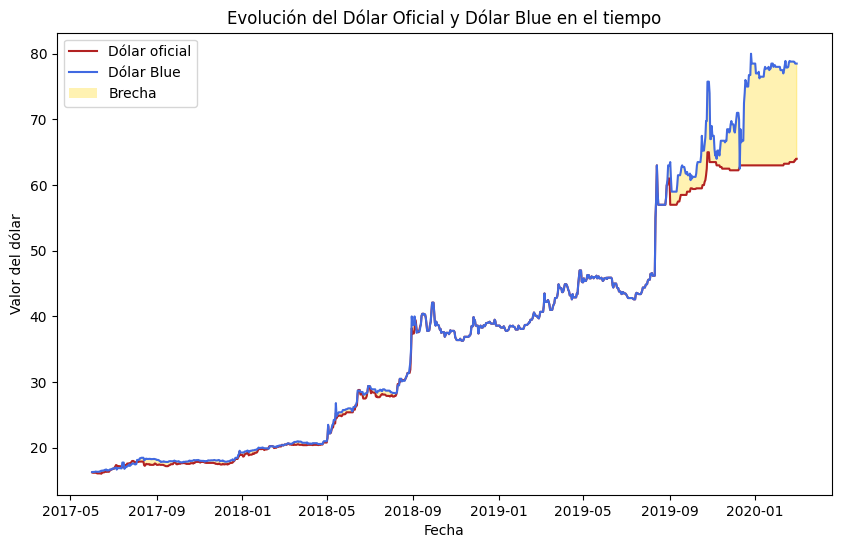

In [15]:
from matplotlib.patches import Patch

# Obtener los valores de las columnas "dolar_oficial" y "dolar_blue"
dolar_oficial = df_tipos_cambio['dolar_oficial']
dolar_blue = df_tipos_cambio['dolar_blue']

# Obtener la fecha como eje X
fecha = df_tipos_cambio['fecha']

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las curvas "dolar_oficial" y "dolar_blue"
oficial_plot, = ax.plot(fecha, dolar_oficial, label='Dólar oficial', color='firebrick')
blue_plot, = ax.plot(fecha, dolar_blue, label='Dólar Blue', color='royalblue')

# Rellenar el área entre las curvas con un tercer color
ax.fill_between(fecha, dolar_oficial, dolar_blue, where=dolar_oficial >= dolar_blue, interpolate=True, color='gold', alpha=0.3)
ax.fill_between(fecha, dolar_oficial, dolar_blue, where=dolar_oficial < dolar_blue, interpolate=True, color='gold', alpha=0.3)

# Crear los objetos Patch para la leyenda
patch_brecha = Patch(facecolor='gold', alpha=0.3, label='Brecha')

# Personalizar los ejes y la leyenda
ax.set_xlabel('Fecha')
ax.set_ylabel('Valor del dólar')
ax.set_title('Evolución del Dólar Oficial y Dólar Blue en el tiempo')
ax.legend(handles=[oficial_plot, blue_plot, patch_brecha], labels=['Dólar oficial', 'Dólar Blue', 'Brecha'])

# Mostrar la gráfica
plt.show()

En el análisis de esta gráfica se observa una tendencia alcista en los valores tanto del dólar oficial como del dólar blue. Se puede apreciar que desde septiembre de 2018 hasta septiembre de 2019 la brecha entre la cotización oficial y la paralela fue prácticamente inexistente. Sin embargo, antes de septiembre de 2018 esta brecha era muy reducida y después de septiembre de 2019 fue aumentando progresivamente. Además, antes y después del período de brecha insignificante se aprecian incrementos abruptos en la cotización. Este comportamiento claramente puede atribuirse a la implementación y levantamiento de medidas restrictivas en el mercado cambiario.

---
#### 3.2.2 - Cantidad de turistas de cada país con respecto al total por tiempo

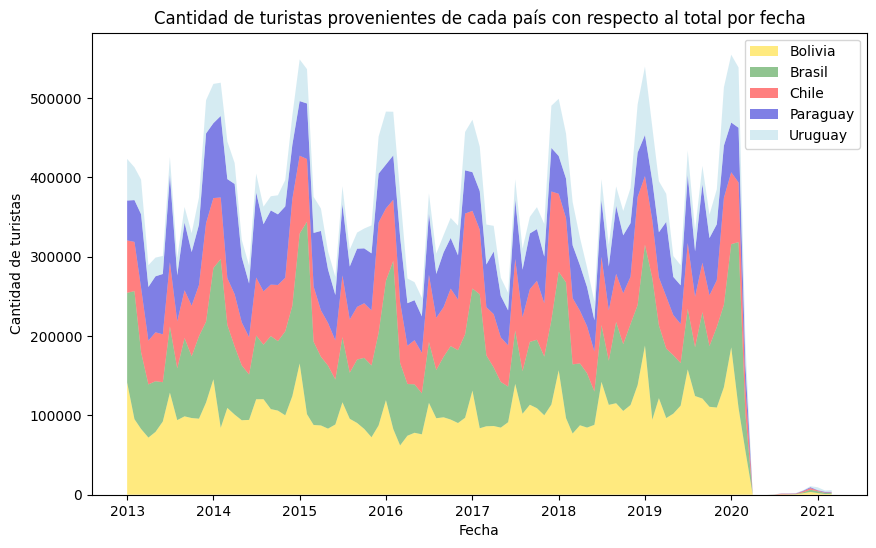

In [16]:
# Crear una copia del dataframe df_llegadas_turistas
df_copia = df_llegadas_turistas.copy()

# Agregar una columna 'total' con la suma de los valores de las columnas de cada país
df_copia['total'] = df_copia[['bolivia', 'brasil', 'chile', 'paraguay', 'uruguay']].sum(axis=1)

# Configurar los colores para cada país
colores = ['gold', 'forestgreen', 'red', 'mediumblue', 'lightblue']

# Crear el gráfico de área apilado
fig, ax = plt.subplots(figsize=(10, 6))

# Obtener la fecha y las cantidades de cada país
fechas = df_copia['fecha']
cantidades = [df_copia['bolivia'], df_copia['brasil'], df_copia['chile'], df_copia['paraguay'], df_copia['uruguay']]

# Graficar el área apilada
ax.stackplot(fechas, cantidades, labels=['Bolivia', 'Brasil', 'Chile', 'Paraguay', 'Uruguay'], colors=colores, alpha = 0.5)

# Configurar los ejes y el título del gráfico
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad de turistas')
ax.set_title('Cantidad de turistas provenientes de cada país con respecto al total por fecha')

# Agregar la leyenda
ax.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

En este gráfico de áreas apiladas se representa la proporción de turistas provenientes de diferentes países en un momento determinado. Es evidente que la mayor cantidad de turistas proviene de Bolivia, y esta proporción se mantiene relativamente constante a lo largo del tiempo, con picos lógicos no tan significativos durante los períodos de vacaciones de invierno y verano. Por otro lado, Brasil también contribuye con una cantidad significativa de turistas, aunque su presencia se muestra de manera más discretizada en el transcurso del tiempo, experimentando altos picos durante los períodos vacacionales y disminuyendo durante el resto del año. En el caso de Chile, Paraguay y Uruguay, no se puede discernir claramente su comportamiento debido a que sus áreas están montadas sobre otras en el gráfico, sin embargo, sí se puede observar su proporción en relación con los demás países, siendo la proporción de Chile menor que la de Brasil, la de Paraguay menor que la de Chile y la de Uruguay la más reducida de todas.

A continuación, se presentará un gráfico más informativo en varios aspectos en comparación con el actual. No obstante, antes de continuar, es importante destacar el impacto del cierre de fronteras debido a la pandemia del Covid-19, donde la cantidad de turistas se redujo a cero, y posteriormente, durante la etapa inicial de la recuperación en 2021, el número total de turistas fue al menos dos órdenes de magnitud inferior.

---
#### 3.2.3 - Proporción de turistas de cada país con respecto al total por tiempo
Debido al ocultamiento de ciertos aspectos del comportamiento, en el siguiente gráfico se realizan cinco gráficos de área separados, mostrando su porcentaje con respecto al total de turistas en el tiempo. Para esto, se crea un nuevo dataframe calculando el total de turistas por registro y colocándolo en una nueva columna. Luego se cambia la cantidad de turistas por el porcentaje de cada país con respecto al total. Y finalmente se realiza una gráfica del porcentaje de turistas por país respecto al total en función del tiempo.

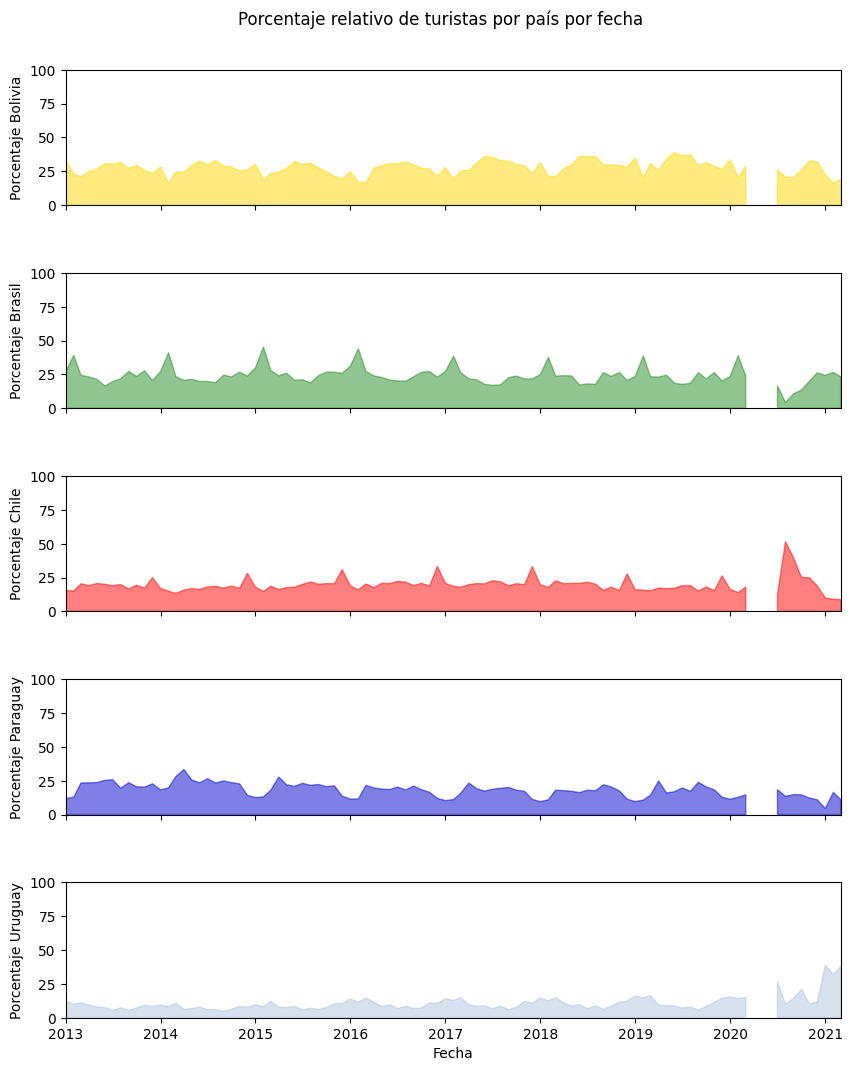

In [17]:
#Crear una copia del dataframe para añadir la columna total
df_porcentaje = df_llegadas_turistas.copy()

# Calcular la suma de las columnas 'bolivia', 'brasil', 'chile', 'paraguay' y 'uruguay'
df_porcentaje['total'] = df_porcentaje[['bolivia', 'brasil', 'chile', 'paraguay', 'uruguay']].sum(axis=1)

# Calcular el porcentaje para cada país respecto al total
df_porcentaje['bolivia'] = df_porcentaje['bolivia'] / df_porcentaje['total'] * 100
df_porcentaje['brasil'] = df_porcentaje['brasil'] / df_porcentaje['total'] * 100
df_porcentaje['chile'] = df_porcentaje['chile'] / df_porcentaje['total'] * 100
df_porcentaje['paraguay'] = df_porcentaje['paraguay'] / df_porcentaje['total'] * 100
df_porcentaje['uruguay'] = df_porcentaje['uruguay'] / df_porcentaje['total'] * 100

# Eliminar la columna 'total'
df_porcentaje = df_porcentaje.drop(columns=['total'])

# Obtener los datos de cada país
data_bolivia = df_porcentaje['bolivia']
data_brasil = df_porcentaje['brasil']
data_chile = df_porcentaje['chile']
data_paraguay = df_porcentaje['paraguay']
data_uruguay = df_porcentaje['uruguay']

# Crear la figura y los subplots
fig, axes = plt.subplots(5, 1, figsize=(10, 12), sharex=True)

# Graficar el área para cada país
axes[0].fill_between(df_porcentaje['fecha'], data_bolivia, color='gold', alpha=0.5)
axes[0].set_ylabel('Porcentaje Bolivia')

axes[1].fill_between(df_porcentaje['fecha'], data_brasil, color='forestgreen', alpha=0.5)
axes[1].set_ylabel('Porcentaje Brasil')

axes[2].fill_between(df_porcentaje['fecha'], data_chile, color='red', alpha=0.5)
axes[2].set_ylabel('Porcentaje Chile')

axes[3].fill_between(df_porcentaje['fecha'], data_paraguay, color='mediumblue', alpha=0.5)
axes[3].set_ylabel('Porcentaje Paraguay')

axes[4].fill_between(df_porcentaje['fecha'], data_uruguay, color='lightsteelblue', alpha=0.5)
axes[4].set_ylabel('Porcentaje Uruguay')

# Ajustar los espacios entre gráficas
plt.subplots_adjust(hspace=0.5, top=0.9)  # Ajuste el valor de 'top' según sus necesidades

# Configurar los ejes y el título del gráfico
axes[-1].set_xlabel('Fecha')
plt.suptitle('Porcentaje relativo de turistas por país por fecha', y=0.95)  # Ajuste el valor de 'y' según sus necesidades

# Obtener los límites de los ejes
min_fecha = df_porcentaje['fecha'].min()
max_fecha = df_porcentaje['fecha'].max()

# Establecer los límites de los ejes
for ax in axes:
    ax.set_ylim(0, 100)
    ax.set_xlim(min_fecha, max_fecha)

# Mostrar el gráfico
plt.show()

Con este gráfico, ahora es posible apreciar con claridad la proporción de turistas de cada país en relación al total, así como el comportamiento de todos los países. Se confirma la observación previa acerca de la proporción de turistas provenientes de cada país con respecto al total, así como el comportamiento más uniforme de los turistas de Bolivia y la concentración en picos en el caso de Brasil. Además, se puede agregar que Chile muestra un comportamiento similar al de Brasil, con picos durante los períodos vacacionales, mientras que Paraguay se asemeja más a Bolivia, siendo más predominante en períodos alejados del comienzo y fin de año, y menos prominente durante esos períodos. También podemos observar que Uruguay presenta un comportamiento similar al de Brasil y Chile, pero con picos más suavizados que se distribuyen más extensamente alrededor de los cambios de año. Resulta interesante destacar que la proporción de turistas chilenos aumenta hacia finales de año, mientras que la proporción de turistas brasileños experimenta un aumento principalmente al comienzo del año.

Por último, también se puede observar el efecto de las medidas restrictivas debido a la pandemia, que resultaron en una disminución total de turistas a cero. Sin embargo, una vez reactivado el turismo, Uruguay adquiere un papel más destacado en términos de aporte de turistas, al igual que Chile, mientras que la proporción de turistas de los demás países parece haber disminuido en relación proporcional, aspecto que no podía visualizarse en el paso anterior.

---
#### 3.2.4 - Mapa de calor
Para no dejar lugar a dudas sobre el dataset de turistas se analizará a partir de un mapa de calor dónde hay una fila para cada país, una columna para cada mes de cada año, y cada celda está coloreada según la cantidad de turistas desde ese país en ese mes en particular, siguiendo un mapa de color.

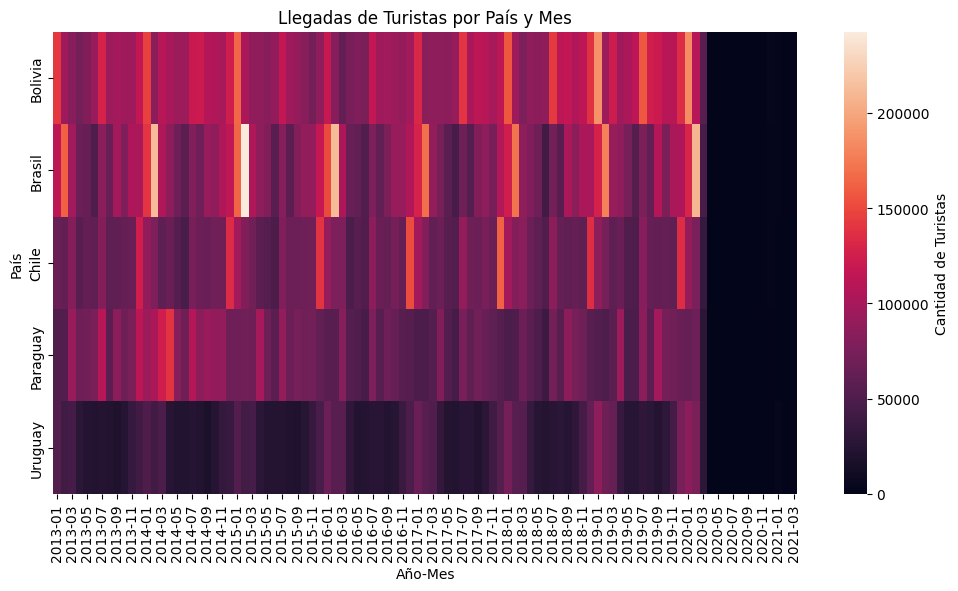

In [18]:
import seaborn as sns

# Copiar el DataFrame original
df_copia = df_llegadas_turistas.copy()

# Calcular el promedio de los valores por columna
promedios = df_copia[['bolivia', 'brasil', 'chile', 'paraguay', 'uruguay']].mean()

# Ordenar las columnas por el promedio de mayor a menor
columnas_ordenadas = promedios.sort_values(ascending=False).index

# Reordenar las columnas en el DataFrame
df_copia = df_copia[['anio', 'mes', 'fecha'] + list(columnas_ordenadas)]

# Modificar los nombres de las columnas
df_copia = df_copia.rename(columns={'bolivia': 'Bolivia', 'brasil': 'Brasil', 'chile': 'Chile',
                                    'paraguay': 'Paraguay', 'uruguay': 'Uruguay'})


# Crear una nueva columna "mes_num" que represente los meses como números del 1 al 12
meses_numeros = {
    'ene': 1, 'feb': 2, 'mar': 3, 'abr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'ago': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dic': 12
}
df_copia['mes_num'] = df_copia['mes'].map(meses_numeros)

# Crear una nueva columna "anio_mes" que combine el año y el mes en un formato YYYY-MM
df_copia['anio_mes'] = df_copia['anio'].astype(str) + '-' + df_copia['mes_num'].astype(str).str.zfill(2)

# Seleccionar solo las columnas relevantes para el heatmap
columnas_heatmap = ['Bolivia', 'Brasil', 'Chile', 'Paraguay', 'Uruguay']
df_heatmap = df_copia[['anio_mes'] + columnas_heatmap]

# Convertir el DataFrame al formato necesario para el heatmap
df_heatmap = df_heatmap.set_index('anio_mes').T

# Ordenar las columnas por fecha
df_heatmap = df_heatmap.reindex(sorted(df_heatmap.columns), axis=1)

# Crear el heatmap utilizando seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(df_heatmap, cmap='rocket', annot=False, fmt='d', cbar=True, cbar_kws={'label': 'Cantidad de Turistas'})
plt.title('Llegadas de Turistas por País y Mes')
plt.xlabel('Año-Mes')
plt.ylabel('País')

# Mostrar el heatmap
plt.show()

Una vez más, se puede observar cómo los colores se aclaran de abajo hacia arriba, lo que indica que a medida que se sube, los países contribuyen con más turistas. También se aprecia el desfase entre los turistas chilenos y brasileños, estando los primeros más concentrados hacia finales de año y los segundos hacia principios de año. El efecto de las restricciones por la pandemia se revela claramente en el rectángulo violeta oscuro y negro del final, que representa la ausencia total de turistas durante esas fechas y la pequeña recuperación. Además, se pueden notar franjas más claras periódicas en las filas correspondientes a Brasil, Chile y Uruguay, mientras que los colores son más uniformes para Paraguay y Bolivia, corroborando las observaciones previas sobre el comportamiento.

En este gráfico, se puede observar de manera más clara que en los anteriores los incrementos y disminuciones de turistas en períodos prolongados. Estos fenómenos podrían explicarse más por procesos endógenos de los países en cuestión que por factores relacionados con Argentina. Por ejemplo, el turismo de Paraguay ha experimentado una disminución a lo largo del tiempo, lo cual se refleja en un oscurecimiento de las celdas correspondientes a fechas más recientes, mientras que ocurre lo contrario en el caso de Uruguay. También se puede observar un período de escaso turismo boliviano desde julio de 2015 hasta junio de 2016, así como tres años de baja afluencia de turistas brasileños durante los veranos en comparación con otros años.

---
### 3.3 - Gráficos de correlaciones
En esta sección el objetivo es encotrar si existe alguna correlación entre la afluencia de turistas de países limítrofes y la cotización del dólar en pesos argentinos. 

---
#### 3.3.1 - Crear dataframe conjunto
Para poder comparar los datasets hay que unificar la frecuencia de medida y hacer coincidir los rangos para los cuales hay datos en ambos datasets. Para esto se agrupó la cotización del dólar mensualmente tomando el promedio como método de agregación. Se eligió este método debido a que es la media aritmética de los valores y es buena para homogeneizar los comportamientos de los turistas en ese mes. Además se calculó un promedio entre el valor del dolar oficial y el blue para tener un sólo valor medio entre ambos y transformarlos en una sola variable.

In [19]:
# Agrupar registros de df_tipos_cambio por mes y año
df_tipos_cambio['fecha_agregada'] = pd.to_datetime(df_tipos_cambio['fecha']).dt.to_period('M').dt.start_time
df_tipos_cambio_agrupado = df_tipos_cambio.groupby('fecha_agregada').mean().reset_index()

# Combinar df_tipos_cambio_agrupado con df_llegadas_turistas
df_combinado = pd.merge(df_llegadas_turistas, df_tipos_cambio_agrupado, left_on='fecha', right_on='fecha_agregada', how='inner')
df_combinado = df_combinado.drop('fecha_agregada', axis=1)

# Añadir la columna de dólar promedio
df_combinado['dolar_promedio'] = (df_combinado['dolar_oficial'] + df_combinado['dolar_blue']) / 2

# Mostrar el resultado
print('_______________________________________________________________')
print('El nuevo dataframe resulta:')
print(df_combinado.head())
print('_______________________________________________________________')
print('Con los tipos de columna:')
print(df_combinado.dtypes)

_______________________________________________________________
El nuevo dataframe resulta:
   anio  mes      fecha  bolivia  brasil  chile  paraguay  uruguay  \
0  2017  jun 2017-06-01    91354   44950  51901     44105    22149   
1  2017  jul 2017-07-01   139655   67292  90150     74440    25872   
2  2017  ago 2017-08-01   101980   53708  67773     60127    26348   
3  2017  sep 2017-09-01   113370   79188  66416     70244    20974   
4  2017  oct 2017-10-01   108988   86278  74250     65150    27705   

   dolar_oficial  dolar_blue  dolar_promedio  
0      16.293333   16.498000       16.395667  
1      17.375484   17.169355       17.272419  
2      17.626290   18.218065       17.922177  
3      17.428333   17.948333       17.688333  
4      17.661290   17.963871       17.812581  
_______________________________________________________________
Con los tipos de columna:
anio                       int64
mes                       object
fecha             datetime64[ns]
bolivia         

<ipython-input-19-22f651169ff0>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tipos_cambio_agrupado = df_tipos_cambio.groupby('fecha_agregada').mean().reset_index()


---
#### 3.3.2 - Gráfico de dispersión 
El primer gráfico que se eligió para el análisis de la correlación es uno de dispersión con los turistas para cada mes con respecto a valor del dólar para todos los países en un sólo gráfico.

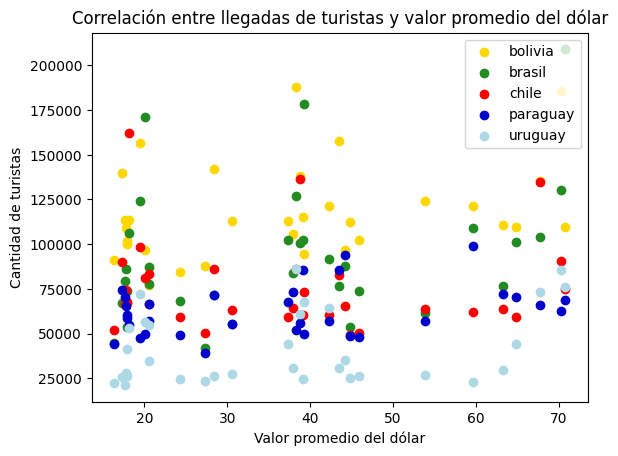

In [20]:
# Crear una lista de colores para asignar a cada país
colores = ['gold', 'forestgreen', 'red', 'mediumblue', 'lightblue']

# Crear el scatter plot
for i, pais in enumerate(['bolivia', 'brasil', 'chile', 'paraguay', 'uruguay']):
    plt.scatter(df_combinado['dolar_promedio'], df_combinado[pais], color=colores[i], label=pais)

# Establecer los títulos y etiquetas de los ejes
plt.title('Correlación entre llegadas de turistas y valor promedio del dólar')
plt.xlabel('Valor promedio del dólar')
plt.ylabel('Cantidad de turistas')

# Agregar la leyenda
plt.legend()

# Mostrar el scatter plot
plt.show()

A priori no parece haber una correlación clara entre la cantidad de turistas y el valor promedio del dólar, pero quitando la distorsión de los picos de turistas de los meses vacacionales puede verse una leve tendencia formar un conjunto de puntos alargado que con un ángulo positivo, aunque pequeño, respecto al eje x. Esto podría indicar que mientras más caro es el dólar para los argentinos, más conveniente es para los turistas ingresar al país. Pero como se dijo, no es demasiado representativo por lo que se realizarán más graficos para determinar si existe o no correlación entre las variables.

---
#### 3.3.3 - Gráfico de dispersión separado, con coeficiente de correlación y sin los meses de verano
Para un mejor análisis se separaron los países y se quitaron los picos distorsivos de los meses de verano con gran afluencia de turistas. Además se calculó el coeficiente de correlación para tener una variable cuantitativa para comparar.

In [21]:
# Copiar el dataframe original en una nueva variable
df_no_verano = df_combinado.copy()

# Eliminar los registros que contengan "ene", "feb" o "dic" en la columna 'mes'
meses_a_eliminar = ['ene', 'feb', 'dic']
df_no_verano = df_no_verano[~df_no_verano['mes'].isin(meses_a_eliminar)]

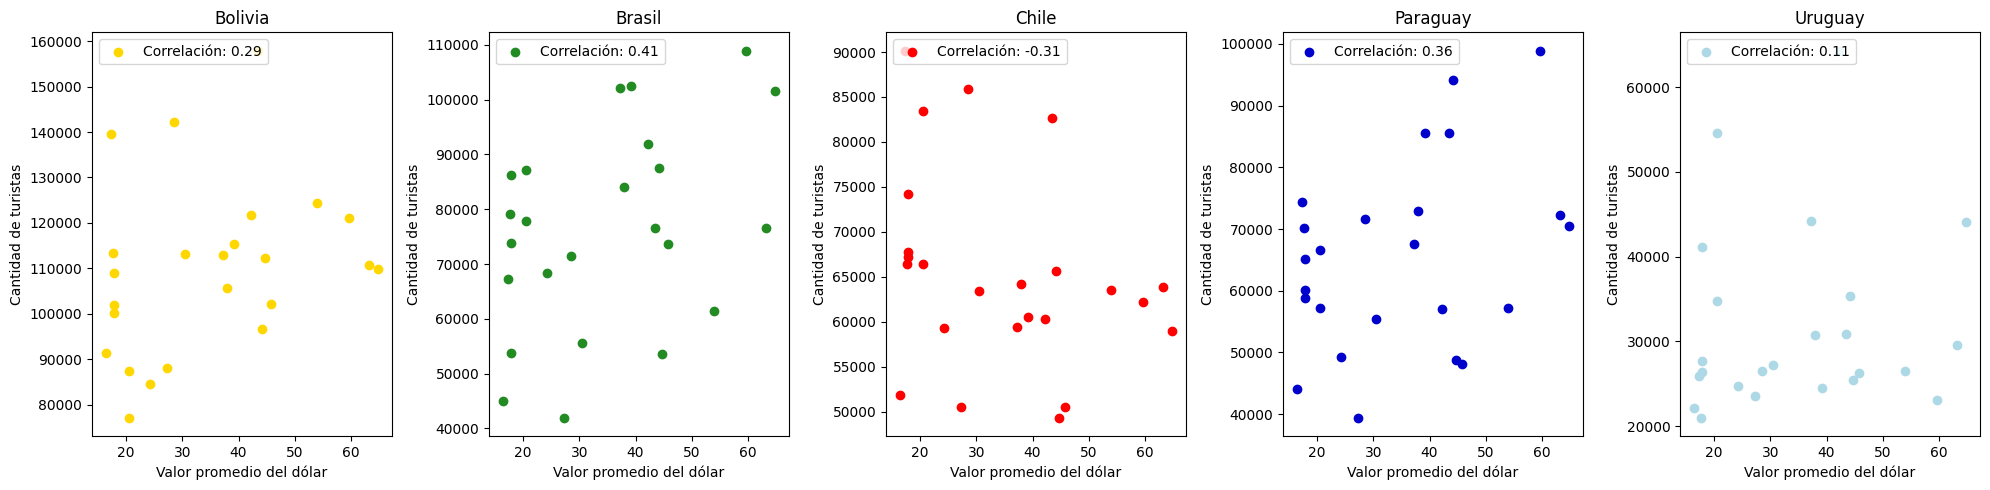

In [22]:
# Crear una lista de colores para asignar a cada país
colores = ['gold', 'forestgreen', 'red', 'mediumblue', 'lightblue']

# Crear diccionario para títulos de gráfico
pais_dict = {'bolivia':'Bolivia','brasil':'Brasil','chile':'Chile','paraguay':'Paraguay','uruguay':'Uruguay'}

# Crear una figura y subtramas con 1 fila y 5 columnas
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

# Iterar sobre los países y crear un scatter plot para cada uno
for i, pais in enumerate(['bolivia', 'brasil', 'chile', 'paraguay', 'uruguay']):
    # Calcular el coeficiente de correlación de Pearson
    corr_coef = np.corrcoef(df_no_verano['dolar_promedio'], df_no_verano[pais])[0, 1]
    
    scatter = axs[i].scatter(df_no_verano['dolar_promedio'], df_no_verano[pais], color=colores[i])
    
    # Establecer el título del gráfico
    axs[i].set_title(pais_dict[pais]) 

    # Establecer la etiqueta del eje X
    axs[i].set_xlabel('Valor promedio del dólar')

    # Establecer la etiqueta del eje Y  
    axs[i].set_ylabel('Cantidad de turistas')  
    
    # Agregar una leyenda con el coeficiente de correlación
    axs[i].legend(handles=[scatter], labels=[f'Correlación: {corr_coef:.2f}'], loc='upper left')

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

A pesar de los esfuerzos realizados para analizar la correlación entre las variables, no se observa una correlación fuerte entre ellas. Todas las variables presentan un valor de correlación de Pearson inferior a 0.5 en valor absoluto. Es importante destacar que Brasil muestra la correlación más alta, aunque sigue siendo baja, mientras que Uruguay presenta la menor correlación. Además, todos los países, excepto Chile, tienen coeficientes de correlación positivos. Sin embargo, debido a que los valores son bajos, el signo de la correlación tampoco proporciona indicios claros.

---
#### 3.3.4 - Diagrama de dispersión conectado
En nuevo intento de arrojar luz en este tema se realizan cinco gráficos, uno para cada país, de dispersión en las variables de cantidad de turistas y valor del dólar pero ahora conectado con la variable tiempo. Para estos gráficos se volvieron incluir los meses de verano.

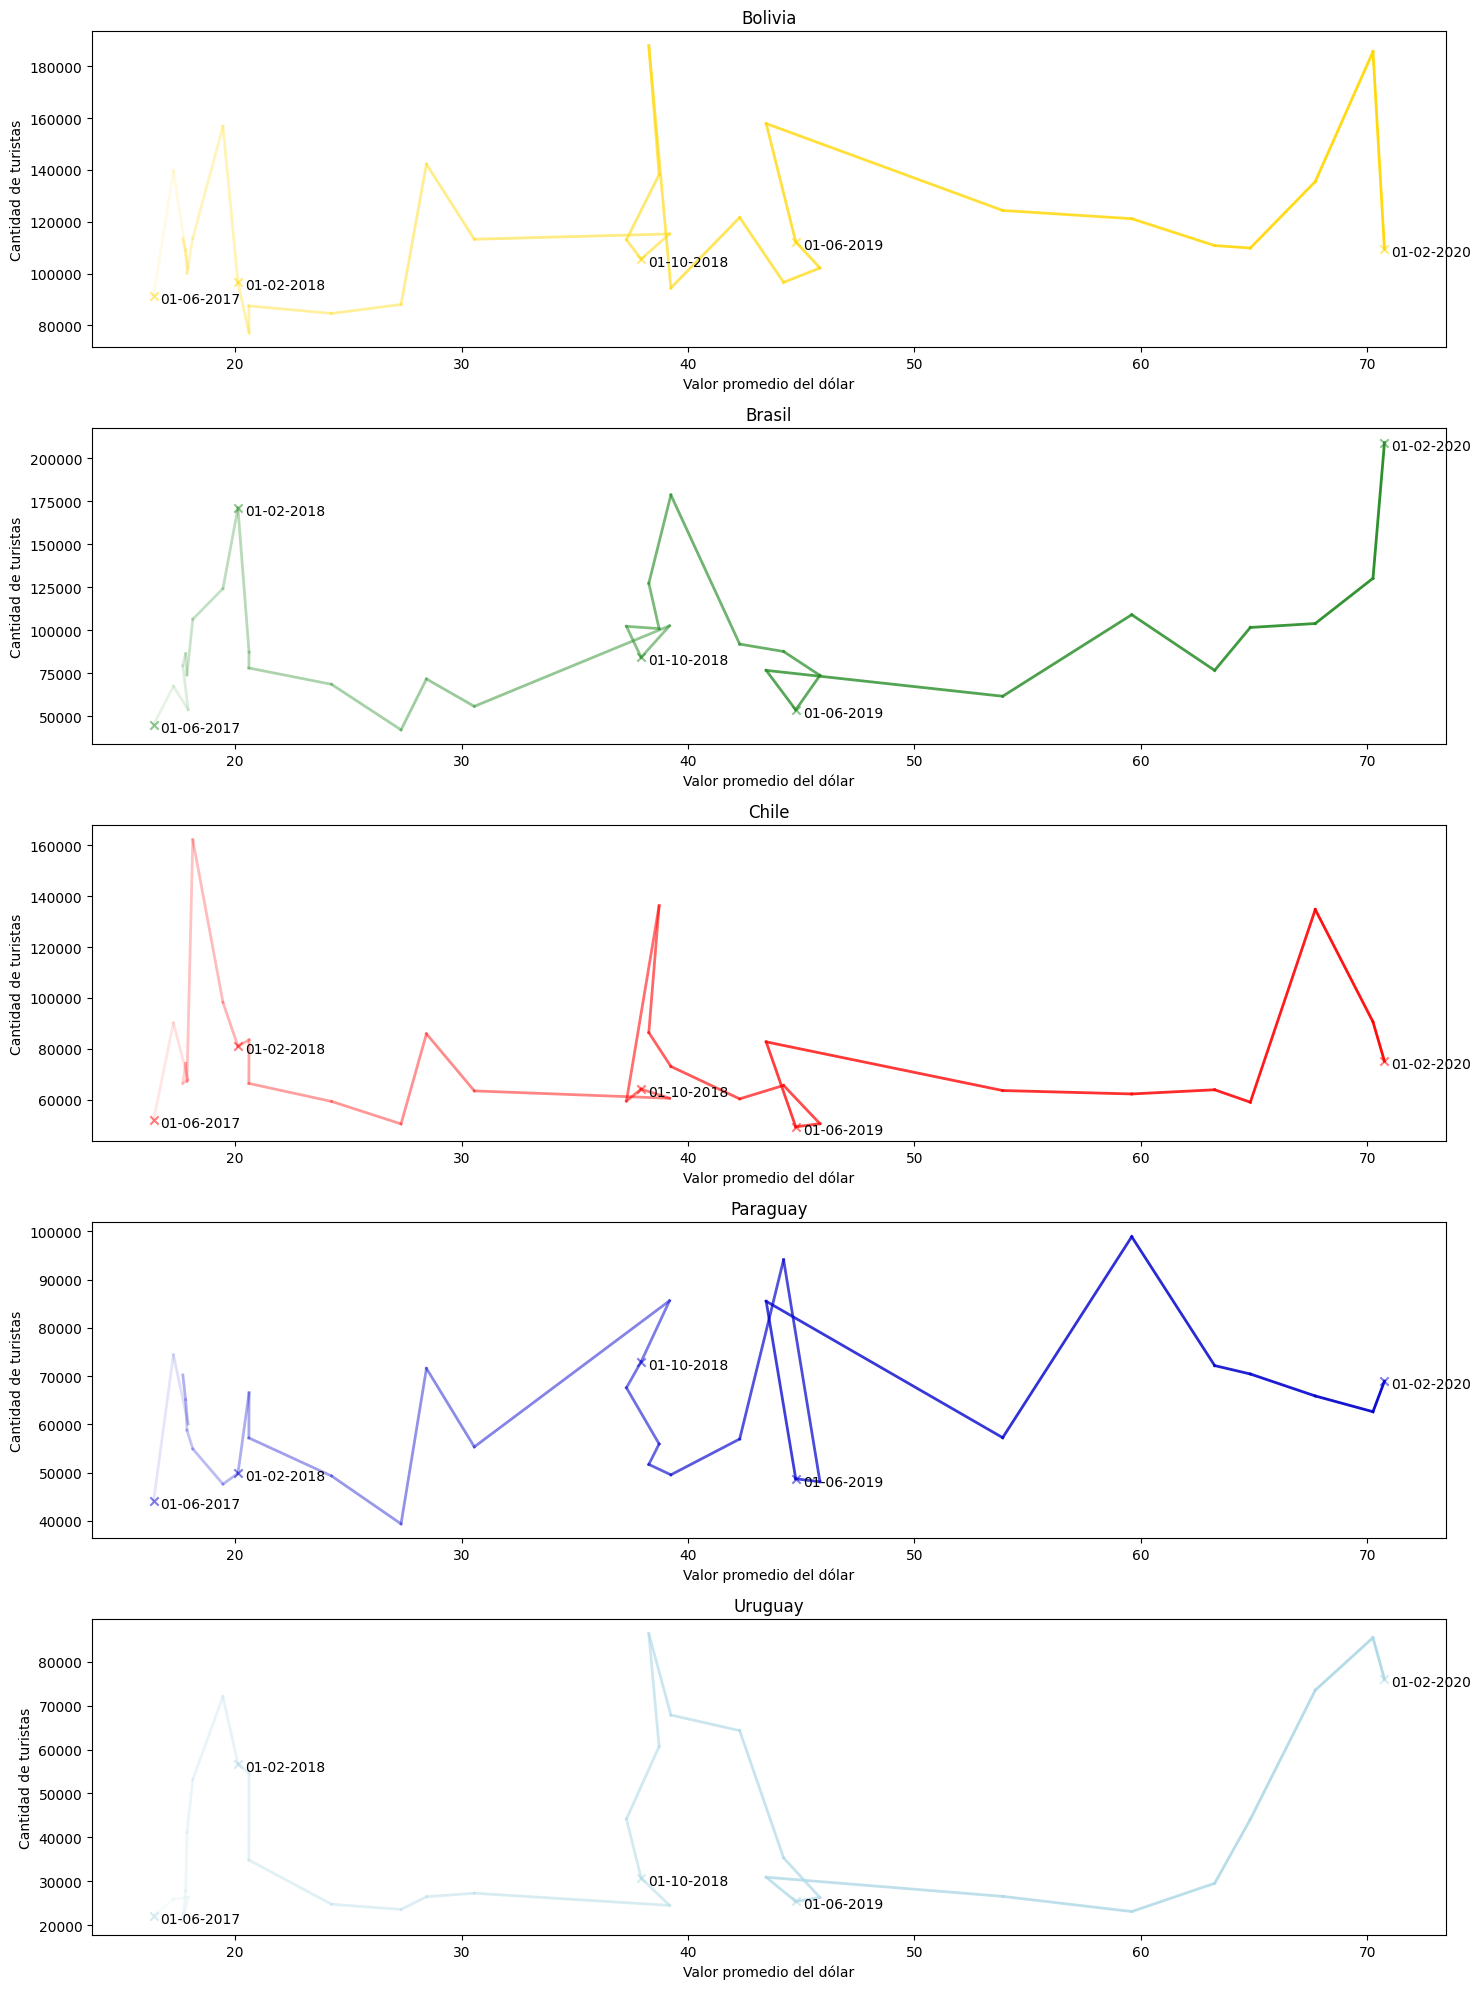

In [23]:
# Crear una lista de colores para asignar a cada país
colores = ['gold', 'forestgreen', 'red', 'mediumblue', 'lightblue']

# Crear diccionario paises
paises_dict = {'bolivia':'Bolivia', 'brasil':'Brasil', 'chile':'Chile', 'paraguay': 'Paraguay', 'uruguay': 'Uruguay'}

# Crear una figura y subtramas con 5 filas y 1 columna
fig, axs = plt.subplots(5, 1, figsize=(15, 20))

# Iterar sobre los países y crear un gráfico de serie temporal para cada uno
for i, pais in enumerate(['bolivia', 'brasil', 'chile', 'paraguay', 'uruguay']):
    # Obtener los valores de fecha, cantidad de turistas y dolar_promedio para el país actual
    fechas = df_combinado['fecha']
    turistas = df_combinado[pais]
    dolar_promedio = df_combinado['dolar_promedio']
    
    # Calcular el valor de transparencia (alpha) basado en el orden de las fechas
    alpha = [0.1 + (1.0 - 0.1) * (idx / len(fechas)) for idx in range(len(fechas))]
    
    # Dibujar las líneas de la serie temporal con el valor de alpha adecuado en cada iteración
    for j in range(len(fechas) - 1):
        axs[i].plot([dolar_promedio[j], dolar_promedio[j + 1]], [turistas[j], turistas[j + 1]],
                    color=colores[i], linewidth=2, alpha=alpha[j])
    
    # Establecer el título del gráfico
    axs[i].set_title(paises_dict[pais])  

    # Establecer la etiqueta del eje X
    axs[i].set_xlabel('Valor promedio del dólar') 

    # Establecer la etiqueta del eje Y 
    axs[i].set_ylabel('Cantidad de turistas')  
    
    # Agregar cruces que representen las fechas de referencia
    indices_puntos = [0, len(fechas) // 4, len(fechas) // 2, 3 * len(fechas) // 4, len(fechas) - 1]  # Índices de las fechas de referencia
    axs[i].scatter(dolar_promedio[indices_puntos], turistas[indices_puntos], color=colores[i], marker='x', alpha=0.5)
    
    # Agregar etiquetas para las fechas de referencia
    for idx in indices_puntos:
        axs[i].annotate(fechas[idx].strftime('%d-%m-%Y'), (dolar_promedio[idx], turistas[idx]),
                        xytext=(5, -5), textcoords='offset points')

# Ajustar el espaciado entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()



En estos gráficos pueden notarse unos comportamientos similares en todas las gráficas alrededor del verano, en dónde se presentan unos "bucles" antes y después de los picos. Suceden tanto en verano de 2017 y 2018, con distintas características según el país, siendo a veces más grandes y otras más chicos. Estos bucles pueden deberse a que siempre entre los picos turísticos hay valles turísticos, pero el dólar nunca deja de aumentar en valor, entonces genera esta anticorrelación y corrección son las que que forman los bucles.  

Es interesante destacar que en 2020 esto no sucede, pero como se puede ver en la primera gráfica de la evolución de la cotización del dólar en el tiempo, el dólar de igual manera no para de subir, entonces puede deberse a una mayor afluencia de turistas.

---
#### 3.3.5 - Total de turistas y cotización del dólar en el tiempo
Finalmente antes de las coclusiones finales se realiza un gráfico del total de turistas en paralelo con la cotización del dólar a lo largo del tiempo. Para esto, se calcula el total de turistas para cada registro y se agrega en una nueva columna.

In [24]:
# Sumar los valores de las columnas 'bolivia', 'brasil', 'chile', 'paraguay' y 'uruguay'
df_combinado['total'] = df_combinado[['bolivia', 'brasil', 'chile', 'paraguay', 'uruguay']].sum(axis=1)

#Reubicar la columna
# Obtener el índice de la columna 'uruguay'
indice_uruguay = df_combinado.columns.get_loc('uruguay')

# Mover la columna 'total' a la derecha de la columna 'uruguay'
df_combinado = df_combinado[list(df_combinado.columns[:indice_uruguay + 1]) + ['total'] + list(df_combinado.columns[indice_uruguay + 1:])]

# Eliminar la columna duplicada
df_combinado = df_combinado.loc[:, ~df_combinado.columns.duplicated()]

# Verificar el resultado
print('______________________________________________________________________')
print('Dataframe resultante:')
print(df_combinado.head())


______________________________________________________________________
Dataframe resultante:
   anio  mes      fecha  bolivia  brasil  chile  paraguay  uruguay   total  \
0  2017  jun 2017-06-01    91354   44950  51901     44105    22149  254459   
1  2017  jul 2017-07-01   139655   67292  90150     74440    25872  397409   
2  2017  ago 2017-08-01   101980   53708  67773     60127    26348  309936   
3  2017  sep 2017-09-01   113370   79188  66416     70244    20974  350192   
4  2017  oct 2017-10-01   108988   86278  74250     65150    27705  362371   

   dolar_oficial  dolar_blue  dolar_promedio  
0      16.293333   16.498000       16.395667  
1      17.375484   17.169355       17.272419  
2      17.626290   18.218065       17.922177  
3      17.428333   17.948333       17.688333  
4      17.661290   17.963871       17.812581  


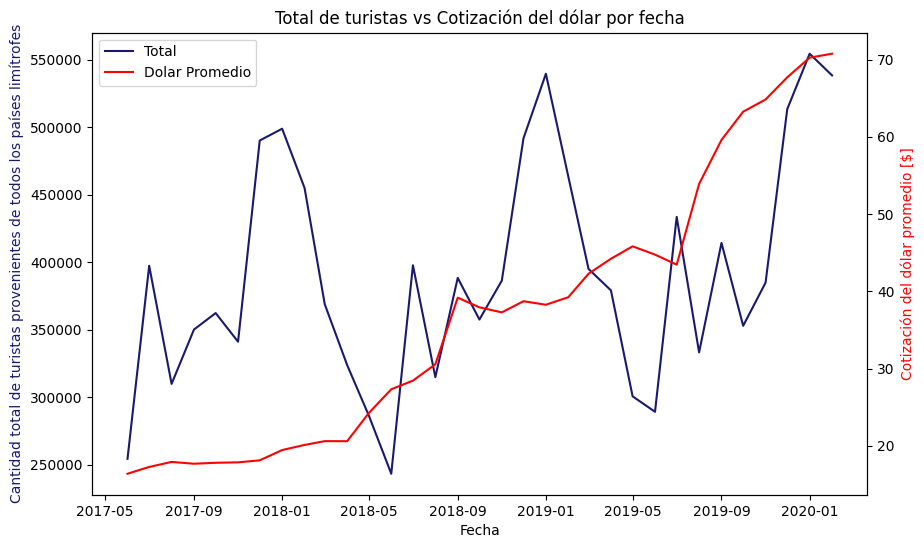

In [25]:
# Crear el gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar 'total' en el primer eje (izquierdo)
ax1.plot(df_combinado['fecha'], df_combinado['total'], color='midnightblue', label='Total')
ax1.set_ylabel('Cantidad total de turistas provenientes de todos los países limítrofes', color='midnightblue')

# Crear el segundo eje (derecho) y graficar 'dolar_promedio'
ax2 = ax1.twinx()
ax2.plot(df_combinado['fecha'], df_combinado['dolar_promedio'], color='red', label='Dolar Promedio')
ax2.set_ylabel('Cotización del dólar promedio [$]', color='red')

# Combinar las leyendas en una sola
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Establecer la etiqueta en el eje x
ax1.set_xlabel('Fecha')

# Establecer el título
plt.title('Total de turistas vs Cotización del dólar por fecha')

# Mostrar el gráfico
plt.show()



En este gráfico se pueden observar los ciclos de los períodos vacacionales de invierno y verano, así como un pico intermedio que se asemeja más al período invernal que al estival. Sin embargo, la información más relevante que proporciona el gráfico es la tendencia creciente de los picos desde el incremento en la cotización del dólar a partir de 2018. Incluso el valor mínimo en el período otoñal es más alto en comparación con años anteriores.

## Conlcusiones

En este informe se analizaron los datasets de valores del dólar oficial y paralelo en el período de junio de 2017 a febrero de 2020 y del ingreso mensual de turistas de los países limítrofes a Argentina en el período de enero de 2013 a marzo de 2021. Luego se realizó un trabajo de limpieza e imputación dónde se imputaron los datos faltantes del dataset de cotización del dólar y se corrigieron errores en el de llegadas de turistas. Luego se realizó un análisis exploratorio calculando medidas de resumen y realizando gráficas para observar los comportamientos. Finalmente se realizaron otra variedad de gráficas y se calcularon coeficientes de correlación para intentar relacionar los comportamientos de las variaciones en la cotización del dólar en Argentina y el ingreso de turistas de países limítrofes.

Del análisis del dataset de la cotización del dólar se extrae una tendencia creciente en el tiempo y un gran aumento de la brecha a partir de septiembre de 2019.

Tras explorar el dataset de las llegadas mensuales de turistas de países limítrofes puede verse el órden de los países según la cantidad de turistas que aportan en órden decreciente es: Bolivia, Brasil, Chile, Paraguay y Uruguay. Además en cuanto el comportamiento general se observa que Brasil, Chile y Uruguay aportan más turistas en los períodos vacacionales mientras que Bolivia y Paraguay son más constantes en el tiempo. En términos generales, también puede verse el efecto de las restricciones a causa de la pandemia de Covid19 a partir de marzo de 2020 y que la recuperación de 2021 es muy leve. Y en términos particulares, se observa que tanto Chile como Uruguay tuvieron una recuperación más grande que el resto de países en proporción, que mientras la afluencia de turistas paraguayos es cada vez menor en el tiempo, la de uruguayos es cada vez mayor, que Bolivia disminuyó su aporte turístico a fines de 2015 por un período de medio año y que brasil tuvo un período de tres años con baja afluencia de turistas con respecto a los demás períodos.

Luego, al graficar y calcular coeficientes de correlación, no se pudieron apreciar niveles de correlación considerables, aún eliminando las distorsiones de los períodos vacacionales estivales. Esto puede deberse a que la variación de la llegada de turistas es cíclica en el tiempo, contando con picos altos y retornando a valles de similar altura, la cotización del dólar siempre va en ascenso. A pesar de esto se pudo observar que para algunos países los diagramas de dispersión vislumbran una correlación, aglomerandose los puntos en una suerte de forma alargada con inicio en la esquina inferior izquierda y final a media altura en el extremo derecho del eje x. Como esta pista no es suficiente para ninguna conclusión, ya que los coeficientes de correlación de Pearson no superan en valor absoluto a 0.5, se procedió a calcular y comparar el total de turistas con el promedio de las cotizaciones del dólar en función del tiempo. En esta última gráfica puede verse cómo a medida que el valor del dólar crece los picos de los ciclos turísticos se hacen progresivamente más altos. 

Se concluye que a pesar de la dificultad de hallar una correlación debido a lo disímiles que son las formas en que las variables evolucionan, hay una correlación entre el aumento de la cotización del dólar y el aumento en el turismo desde países limítrofes. Esto puede deberse a que mientras más caro es el dólar para los argentinos, más barato es el estilo de vida para los turistas. 


---
##4 - Exportar el dataframe final a .parquet

In [26]:
# Exportar el dataframe en formato Parquet
df_combinado.to_parquet('df_turistas_dolar.parquet', index=False)